In [71]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# This library will be required for label encodings for car company name
#from sklearn.preprocessing import LabelEncoder

# This will be used to get the dictionary mapping for the car company encodings done using LabelEncoder
from sklearn import preprocessing

# This library will be required to split the data set into train and test sets respectively.
from sklearn.model_selection import train_test_split

# This will be required to scale the data.
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing STATS MODEL
import statsmodels.api as sm

# Import VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

# Set Precision to 8 for better readability
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# Ignore Warnings
warnings.filterwarnings('ignore')


In [73]:
##Data Import & Preparation
df = pd.read_csv("C:\\Users\kinch\\Downloads\\CarPrice_Assignment.csv")
df
df.isnull().any()
df.isnull().sum()
round(100*(df.isnull().sum()/len(df.index)), 2)


car_ID             0.0000
symboling          0.0000
CarName            0.0000
fueltype           0.0000
aspiration         0.0000
doornumber         0.0000
carbody            0.0000
drivewheel         0.0000
enginelocation     0.0000
wheelbase          0.0000
carlength          0.0000
carwidth           0.0000
carheight          0.0000
curbweight         0.0000
enginetype         0.0000
cylindernumber     0.0000
enginesize         0.0000
fuelsystem         0.0000
boreratio          0.0000
stroke             0.0000
compressionratio   0.0000
horsepower         0.0000
peakrpm            0.0000
citympg            0.0000
highwaympg         0.0000
price              0.0000
dtype: float64

In [74]:
df.shape

(205, 26)

In [75]:
df.drop(labels = ['car_ID'], axis = 1, inplace = True)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [77]:
df['CompanyName'] = df['CarName'].str.split().str[0]


In [78]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250.0000,audi
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710.0000,audi
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920.0000,audi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.9000,3086,ohc,five,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,23875.0000,audi
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,178.2000,67.9000,52.0000,3053,ohc,five,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,17859.1670,audi


In [79]:
df.drop('CarName', axis = 1, inplace = True)


In [80]:
df['CompanyName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [81]:
df['CompanyName'] = df['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
df['CompanyName'] = df['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
df['CompanyName'] = df['CompanyName'].replace(['Nissan'], 'nissan')
df['CompanyName'] = df['CompanyName'].replace(['porcshce'], 'porsche')
df['CompanyName'] = df['CompanyName'].replace(['toyouta'], 'toyota')
df['CompanyName'] = df['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

#Now lets look into the unique values in 'Comapny Name' again-
df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [82]:
df.describe()



,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


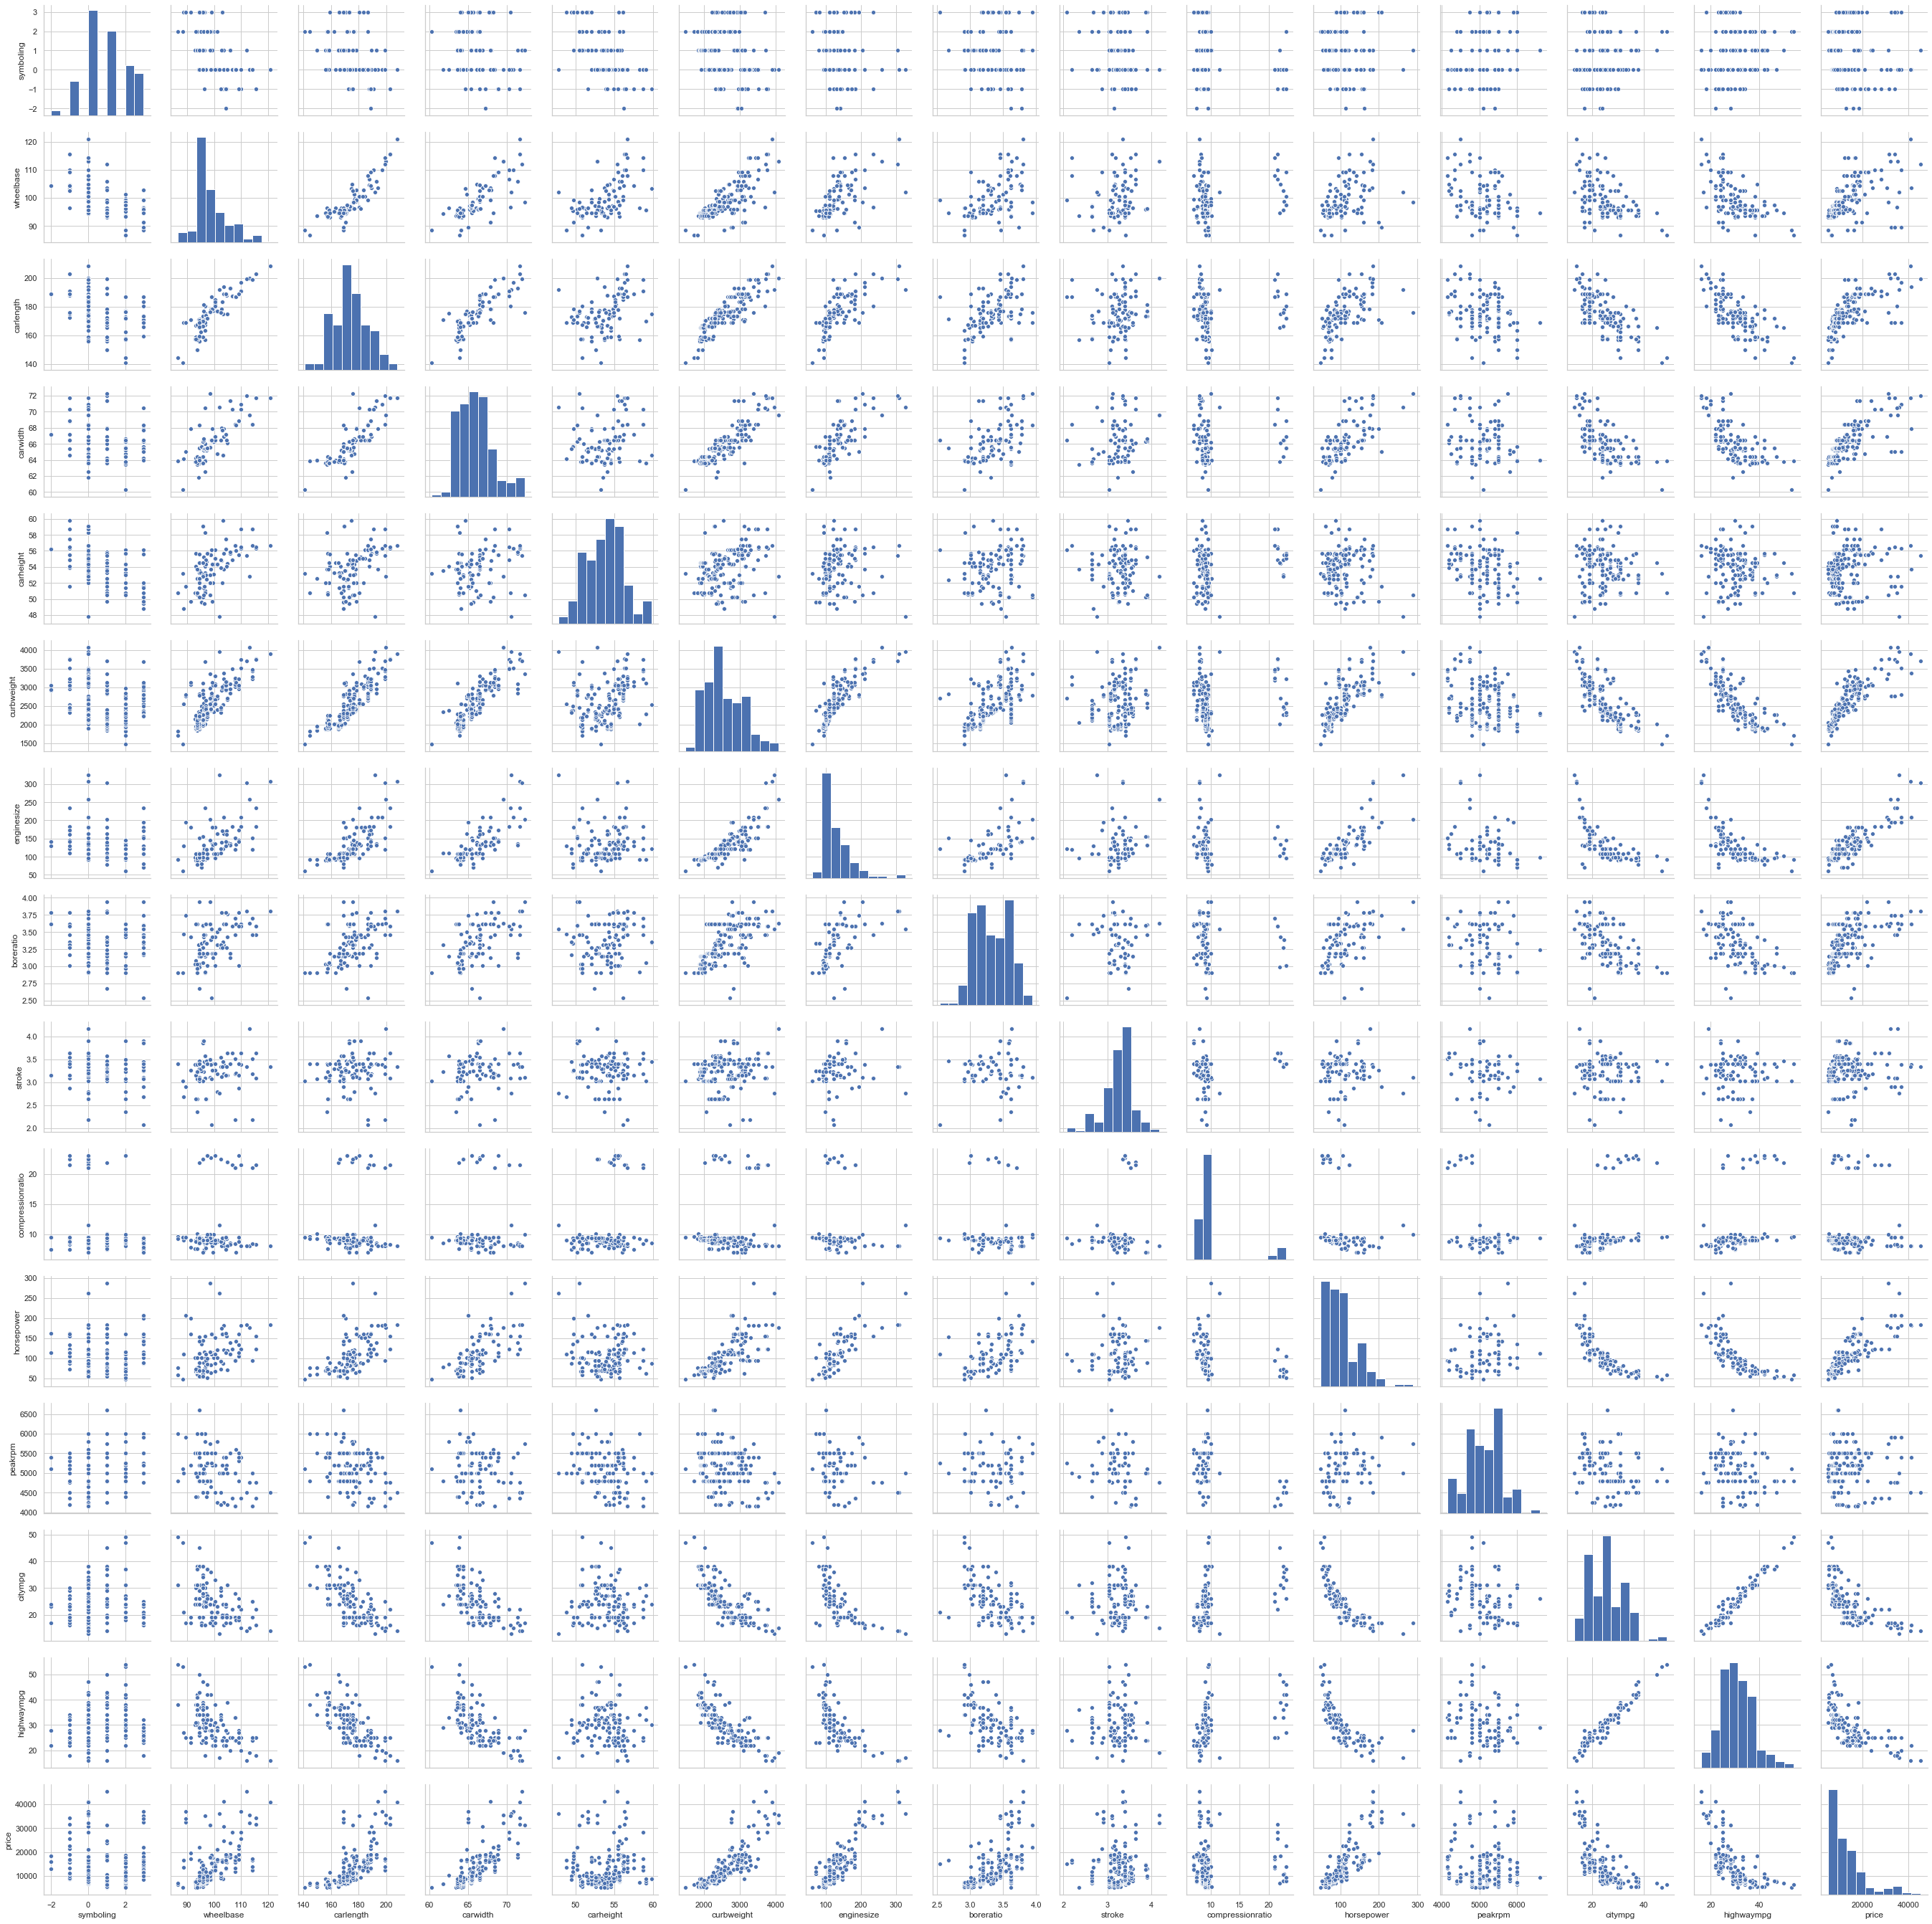

In [83]:
# Pair plot for the numeric variables showing how they fair against each other.

pairplot = sns.pairplot(df)
#pairplot.fig.set_size_inches(20,20)
plt.show()

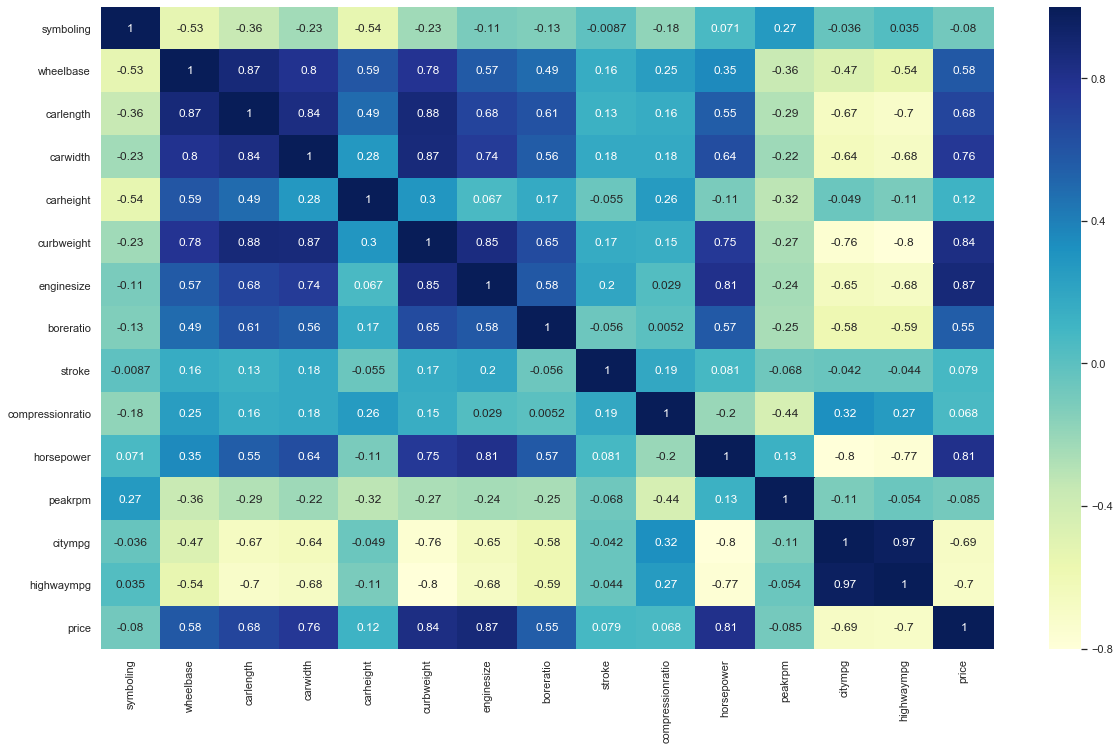

In [84]:
# Lets see the correlation plot among the numeric variables showing how strongly they are related 
# to each other and to 'price'.

plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

CompanyName
jaguar       35550.0000
buick        32892.0000
porsche      32528.0000
bmw          22835.0000
volvo        18420.0000
audi         17710.0000
peugeot      16630.0000
mercury      16503.0000
alfa-romeo   16500.0000
saab         15275.0000
mazda        10595.0000
volkswagen    9737.5000
renault       9595.0000
toyota        9103.0000
isuzu         8916.5000
mitsubishi    8499.0000
nissan        8124.0000
subaru        7894.0000
plymouth      7609.0000
dodge         7609.0000
honda         7295.0000
chevrolet     6295.0000
Name: price, dtype: float64


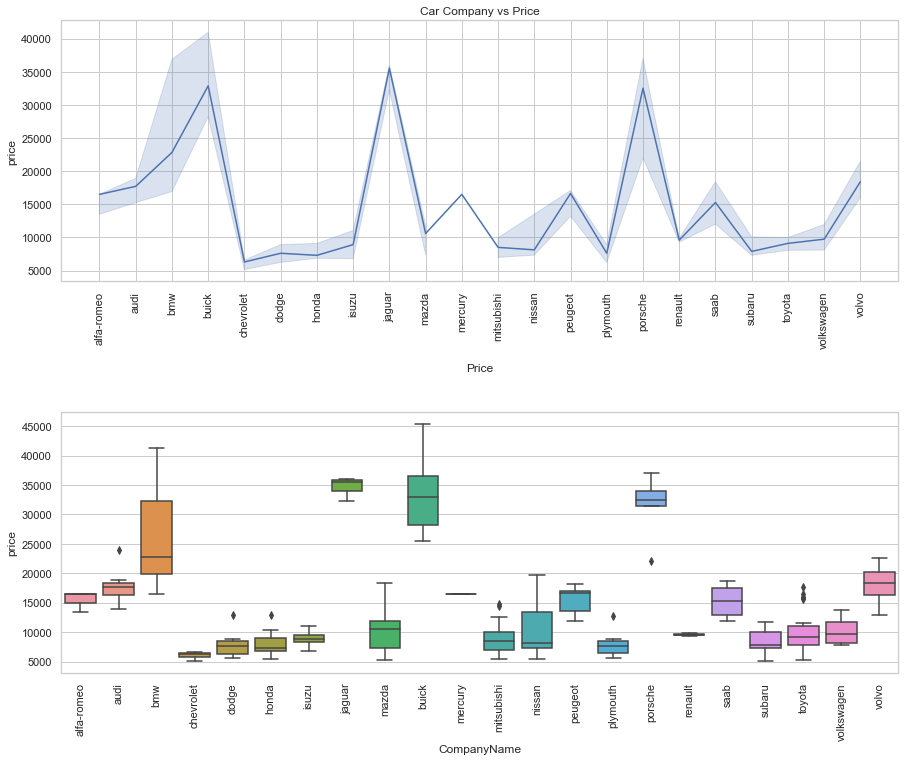

In [85]:
# Lets have a look at the Company Name vs Price distribution

print(df.groupby(by='CompanyName').price.median().sort_values(ascending=False))

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.lineplot(x='CompanyName', y='price', data=df, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Car Company vs Price')
plt.xlabel('Car Company', labelpad = 15)
plt.xlabel('Price', labelpad = 15)

plt.subplot(2, 1, 2)
sns.boxplot(x='CompanyName', y='price', data=df)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.show()

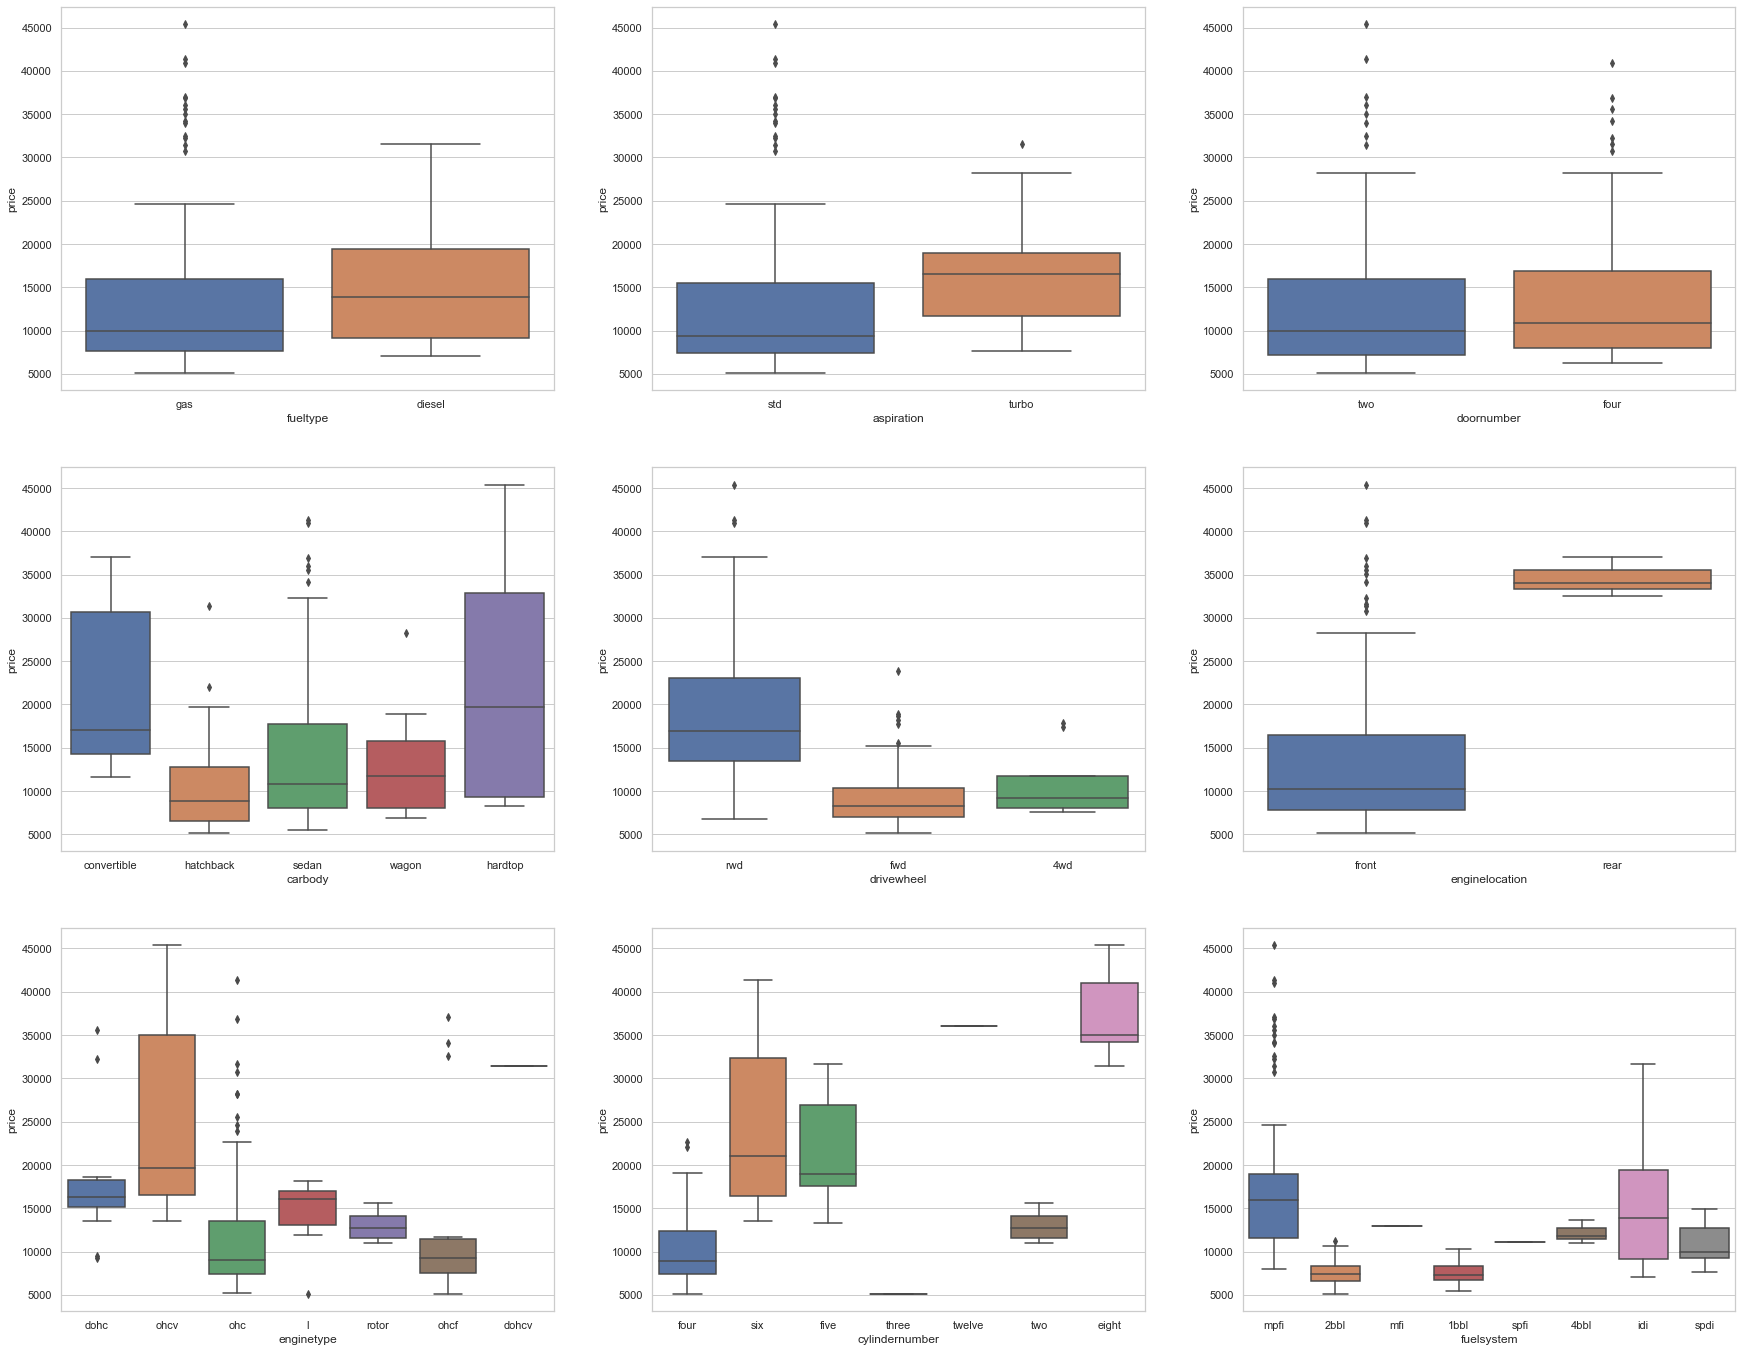

In [86]:
#Now lets see how the above categorical variables relate to the car price. We will see the box plots for each against the price.

plt.figure(figsize=(30, 24))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = df)

plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration', y = 'price', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df)

plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)

plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)

plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)

plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

plt.show()

In [87]:
#mapping to 01

# unique values for fueltype
print("Unique values in fueltype")
print(df['fueltype'].unique())

print('\n')

# unique values for aspiration
print("Unique values in aspiration")
print(df['aspiration'].unique())

print('\n')

# unique values for doornumber
print("Unique values in doornumber")
print(df['doornumber'].unique())

print('\n')

# unique values for carbody
print("Unique values in carbody")
print(df['carbody'].unique())

print('\n')

# unique values for drivewheel
print("Unique values in drivewheel")
print(df['drivewheel'].unique())

print('\n')

# unique values for enginelocation
print("Unique values in enginelocation")
print(df['enginelocation'].unique())

print('\n')

# unique values for enginetype
print("Unique values in enginetype")
print(df['enginetype'].unique())

print('\n')

# unique values for cylindernumber
print("Unique values in cylindernumber")
print(df['cylindernumber'].unique())

print('\n')

# unique values for fuelsystem
print("Unique values in fuelsystem")
print(df['fuelsystem'].unique())


Unique values in fueltype
['gas' 'diesel']


Unique values in aspiration
['std' 'turbo']


Unique values in doornumber
['two' 'four']


Unique values in carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Unique values in drivewheel
['rwd' 'fwd' '4wd']


Unique values in enginelocation
['front' 'rear']


Unique values in enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


Unique values in cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


Unique values in fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [88]:
# map the variable with 2 levels to binary encodings of 0 & 1 - 'fueltype', 'aspiration', 'doornumber', 'enginelocation'

df['fueltype'] = df['fueltype'].map({'diesel':0, 'gas':1})
df['aspiration'] = df['aspiration'].map({'turbo':0, 'std':1})
df['doornumber'] = df['doornumber'].map({'two':0, 'four':1})
df['enginelocation'] = df['enginelocation'].map({'rear':0, 'front':1})


#  dummy variables to ['drivewheel', 'carbody','enginetype', 'cylindernumber', 'fuelsystem'] columns

df = pd.get_dummies(df, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romeo,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romeo,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romeo,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [89]:

cars_category = df.groupby(['CompanyName']).median()
cars_category['price']




CompanyName
alfa-romeo   16500.0000
audi         17710.0000
bmw          22835.0000
buick        32892.0000
chevrolet     6295.0000
dodge         7609.0000
honda         7295.0000
isuzu         8916.5000
jaguar       35550.0000
mazda        10595.0000
mercury      16503.0000
mitsubishi    8499.0000
nissan        8124.0000
peugeot      16630.0000
plymouth      7609.0000
porsche      32528.0000
renault       9595.0000
saab         15275.0000
subaru        7894.0000
toyota        9103.0000
volkswagen    9737.5000
volvo        18420.0000
Name: price, dtype: float64

In [90]:

CarLabels = ['EconomicCars', 'MidTierCars', 'LuxuryCars']
bins = [0, 10000, 20000, 50000]

cars_category = cars_category[['price']].join(pd.get_dummies(pd.cut(cars_category.price, bins, labels=CarLabels)))
cars_category

,price,EconomicCars,MidTierCars,LuxuryCars
CompanyName,,,,
alfa-romeo,16500.0000,0,1,0
audi,17710.0000,0,1,0
bmw,22835.0000,0,0,1
buick,32892.0000,0,0,1
chevrolet,6295.0000,1,0,0
dodge,7609.0000,1,0,0
honda,7295.0000,1,0,0
isuzu,8916.5000,1,0,0
jaguar,35550.0000,0,0,1


In [91]:
# Lets integrate these categories into our main dataframe.


luxuryCars = ['bmw', 'buick', 'jaguar', 'porsche']


def mapCarCompanyToLuxuryCategory(carCompanies):
    val = 0
    if carCompanies in luxuryCars:
        val = 1
    else:
        val = 0
        
    return int(val)


df['LuxuryCars'] = 0
df['LuxuryCars'] = df['CompanyName'].apply(mapCarCompanyToLuxuryCategory)

In [92]:
midTierCars = ['alfa-romeo', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo']
def mapCarCompanyToMidTierCategory(carCompanies1):
    retval = 0
    if carCompanies1 in midTierCars:
        retval = 1
    else:
        retval = 0
    return int(retval)

df['MidTierCars'] = 0
df['MidTierCars'] = df['CompanyName'].apply(mapCarCompanyToMidTierCategory) 

# Lets look at the dataframe again
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romeo,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romeo,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romeo,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [93]:
EconomicCars = ['chevrolet', 'dodge', 'honda', 'isuzu', 'mitsubishi', 'nissan', 'plymouth','renault','subaru','toyota','volkswagen']
def mapCarCompanyToEconomyCategory(carCompanies2):
    retval = 0
    if carCompanies2 in EconomicCars:
        retval = 1
    else:
        retval = 0
    return int(retval)

df['EconomicCars'] = 0
df['EconomicCars'] = df['CompanyName'].apply(mapCarCompanyToEconomyCategory) 
df
df.drop(labels=['CompanyName'], axis = 1, inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,EconomicCars
0,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [94]:
# From the data dictionary we know - Its assigned insurance risk rating, A value of +3 indicates 
# that the auto is risky, -3 that it is probably prety safe.
# So this can be categorized into 3 categories such as - 'HighRisk' - (3, 2), 'ModerateRisk' - (-1, 0, 1), 'LowRisk' - (-2, -3)
def risk(x):
    if x<=3 and x>=2:
        return "HighRisk"
    elif x<=1 and x>=-1:
        return "ModerateRisk"
    elif x<=-2 and x>=-3:
        return "LowRisk"


df["risk_level"]=df['symboling'].map(lambda x:risk(x))
status = pd.get_dummies(df['risk_level'])
df = pd.concat([df, status], axis = 1)

df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,EconomicCars,risk_level,HighRisk,LowRisk,ModerateRisk
0,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,HighRisk,1,0,0
1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,HighRisk,1,0,0
2,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,ModerateRisk,0,0,1
3,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,HighRisk,1,0,0
4,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,HighRisk,1,0,0


In [95]:
df.drop(labels=['symboling','risk_level'], axis = 1, inplace = True)
df.head()


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,EconomicCars,HighRisk,LowRisk,ModerateRisk
0,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [96]:
#drop the highly coorelated variable

df.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)

# lets have a look at the final data before proceeding with the model building.
df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,EconomicCars,HighRisk,LowRisk,ModerateRisk
0,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,13495.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,16500.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,1,1,0,1,94.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,16500.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,1,1,1,99.8000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,13950.0000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,1,1,1,1,99.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,17450.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [97]:
def applyStatsModel(data):
    # Adding a constant variable 
    X_train_linear_model = sm.add_constant(data)
    
    # Run the linear model
    linear_model = sm.OLS(y_train, X_train_linear_model).fit() 
    
    return linear_model

def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    # Calculate the vif factors for all the features.
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [98]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# We will divide the data into 80/20 % to train and test data respectively.
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [99]:
scaler = MinMaxScaler()

num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [100]:
y_train = df_train.pop('price')
X_train = df_train

In [101]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with 20 variables.
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [102]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('fueltype', True, 1),
 ('aspiration', False, 27),
 ('doornumber', False, 29),
 ('enginelocation', False, 26),
 ('wheelbase', True, 1),
 ('carheight', False, 28),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 4),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('drivewheel_4wd', False, 25),
 ('drivewheel_fwd', False, 23),
 ('drivewheel_rwd', False, 24),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 18),
 ('carbody_hatchback', False, 20),
 ('carbody_sedan', False, 21),
 ('carbody_wagon', False, 16),
 ('enginetype_dohc', False, 11),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 17),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 10),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', False, 12),
 ('cylindernumber_five', False, 22),
 ('cylindernumber_four', False, 3),
 ('cylindernumber_six', False, 19),
 ('cylindernumber_three', 

In [103]:
# Lets see the columns that RFE supports - 
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'carbody_convertible',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_mfi', 'fuelsystem_spdi', 'LuxuryCars',
       'LowRisk'],
      dtype='object')

In [104]:
X_train.columns[~rfe.support_]


Index(['aspiration', 'doornumber', 'enginelocation', 'carheight',
       'compressionratio', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spfi', 'MidTierCars', 'EconomicCars',
       'HighRisk', 'ModerateRisk'],
      dtype='object')

In [105]:
#model 1
# Lets now create a data set only with RFE supported columns.
X_train_1 = X_train[col]

# Run the linear model
stats_model_1 = applyStatsModel(X_train_1)

#Let's see the summary of the linear model built above
print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           1.94e-81
Time:                        21:00:11   Log-Likelihood:                 261.64
No. Observations:                 164   AIC:                            -483.3
Df Residuals:                     144   BIC:                            -421.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [106]:
# Calculate the VIFs again for the new model
vif_val_1 = calculateVIF(X_train_1)

# Let's see the vif values
vif_val_1

,Features,VIF
3,enginesize,73.3400
2,curbweight,68.4100
5,stroke,39.7800
6,horsepower,30.0800
1,wheelbase,27.3900
4,boreratio,20.0100
0,fueltype,13.6100
10,enginetype_ohc,12.9400
7,peakrpm,11.9200
18,LuxuryCars,3.7000


In [107]:
#remove fuelsystem_mfi                     

#model 2
X_train_2 = X_train_1.drop(["fuelsystem_mfi"], axis = 1)

# Run the linear model
stats_model_2 = applyStatsModel(X_train_2)

#Let's see the summary of the new linear model
print(stats_model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           2.65e-82
Time:                        21:02:41   Log-Likelihood:                 261.07
No. Observations:                 164   AIC:                            -484.1
Df Residuals:                     145   BIC:                            -425.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [108]:
# Calculate the VIFs again for the new model
vif_val_2 = calculateVIF(X_train_2)

# Let's see the vif values
vif_val_2

,Features,VIF
3,enginesize,73.0900
2,curbweight,68.4100
5,stroke,39.3800
6,horsepower,29.5200
1,wheelbase,27.0700
4,boreratio,19.8300
0,fueltype,13.6000
10,enginetype_ohc,12.9400
7,peakrpm,11.7600
17,LuxuryCars,3.6900


In [109]:
# remove LowRisk
X_train_3 = X_train_2.drop(["LowRisk"], axis = 1)


#model 3

# Run the linear model
stats_model_3 = applyStatsModel(X_train_3)

#Let's see the summary of the new linear model
print(stats_model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           6.63e-83
Time:                        21:03:39   Log-Likelihood:                 259.78
No. Observations:                 164   AIC:                            -483.6
Df Residuals:                     146   BIC:                            -427.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [110]:
# Calculate the VIFs again for the new model
vif_val_3 = calculateVIF(X_train_3)

# Let's see the vif values
vif_val_3

,Features,VIF
3,enginesize,71.2900
2,curbweight,68.3400
5,stroke,35.7000
6,horsepower,29.4200
1,wheelbase,27.0700
4,boreratio,18.8000
0,fueltype,13.3500
10,enginetype_ohc,12.4300
7,peakrpm,11.4500
17,LuxuryCars,3.5600


In [111]:
# cylindernumber_two
#model 4
X_train_4 = X_train_3.drop(["cylindernumber_two"], axis = 1)

# Run the linear model
stats_model_4 = applyStatsModel(X_train_4)

#Let's see the summary of the new linear model
print(stats_model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           6.63e-83
Time:                        21:04:30   Log-Likelihood:                 259.78
No. Observations:                 164   AIC:                            -483.6
Df Residuals:                     146   BIC:                            -427.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [112]:
# Calculate the VIFs again for the new model
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4

,Features,VIF
3,enginesize,71.2900
2,curbweight,68.3400
5,stroke,35.7000
6,horsepower,29.4200
1,wheelbase,27.0700
4,boreratio,18.8000
0,fueltype,13.3500
10,enginetype_ohc,12.4300
7,peakrpm,11.4500
16,LuxuryCars,3.5600


In [113]:
# remove enginesize                
#model 5
X_train_5 = X_train_4.drop(["enginesize"], axis = 1)

# Run the linear model
stats_model_5 = applyStatsModel(X_train_5)

#Let's see the summary of the new linear model
print(stats_model_5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           4.88e-81
Time:                        21:05:55   Log-Likelihood:                 252.10
No. Observations:                 164   AIC:                            -470.2
Df Residuals:                     147   BIC:                            -417.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [114]:
# Calculate the VIFs again for the new model
vif_val_5 = calculateVIF(X_train_5)

# Let's see the vif values
vif_val_5

,Features,VIF
2,curbweight,62.6200
1,wheelbase,27.0700
4,stroke,22.2600
5,horsepower,22.0800
3,boreratio,18.2500
0,fueltype,12.7800
9,enginetype_ohc,10.5400
6,peakrpm,9.9700
10,enginetype_ohcf,2.3300
15,LuxuryCars,2.2100


In [115]:
# remove peakrpm            

#model 6


X_train_6 = X_train_5.drop(["peakrpm"], axis = 1)

# Run the linear model
stats_model_6 = applyStatsModel(X_train_6)

#Let's see the summary of the new linear model
print(stats_model_6.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           1.62e-81
Time:                        21:06:22   Log-Likelihood:                 250.50
No. Observations:                 164   AIC:                            -469.0
Df Residuals:                     148   BIC:                            -419.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.04

In [116]:
# Calculate the VIFs again for the new model
vif_val_6 = calculateVIF(X_train_6)

# Let's see the vif values
vif_val_6

,Features,VIF
2,curbweight,59.8300
1,wheelbase,26.2800
4,stroke,21.8000
5,horsepower,19.0500
3,boreratio,17.6500
8,enginetype_ohc,10.1000
0,fueltype,10.0900
9,enginetype_ohcf,2.2900
14,LuxuryCars,2.1300
7,enginetype_dohcv,1.4300


In [117]:
# high VIF curbweight
#model 7

X_train_7 = X_train_6.drop(["curbweight"], axis = 1)

# Run the linear model
stats_model_7 = applyStatsModel(X_train_7)

#Let's see the summary of the new linear model
print(stats_model_7.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           1.09e-80
Time:                        21:06:47   Log-Likelihood:                 245.55
No. Observations:                 164   AIC:                            -461.1
Df Residuals:                     149   BIC:                            -414.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.02

In [118]:
vif_val_7 = calculateVIF(X_train_7)

# Let's see the vif values
vif_val_7


,Features,VIF
3,stroke,20.2800
2,boreratio,16.0400
4,horsepower,11.7200
1,wheelbase,10.5000
7,enginetype_ohc,9.8000
0,fueltype,9.3900
8,enginetype_ohcf,2.2500
13,LuxuryCars,2.1000
6,enginetype_dohcv,1.3400
5,carbody_convertible,1.2900


In [119]:
# remove stroke    
#model 8
X_train_8 = X_train_7.drop(["stroke"], axis = 1)

# Run the linear model
stats_model_8 = applyStatsModel(X_train_8)

#Let's see the summary of the new linear model
print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     160.7
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           5.62e-81
Time:                        21:07:08   Log-Likelihood:                 243.45
No. Observations:                 164   AIC:                            -458.9
Df Residuals:                     150   BIC:                            -415.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

In [120]:
vif_val_8 = calculateVIF(X_train_8)

# Let's see the vif values
vif_val_8


,Features,VIF
2,boreratio,15.8300
3,horsepower,9.9600
0,fueltype,9.3800
1,wheelbase,9.0900
6,enginetype_ohc,5.4000
7,enginetype_ohcf,2.2200
12,LuxuryCars,1.9500
5,enginetype_dohcv,1.3200
4,carbody_convertible,1.2800
10,cylindernumber_twelve,1.2100


In [121]:
#remove cylindernumber_twelve
#model 9
X_train_9 = X_train_8.drop(["cylindernumber_twelve"], axis = 1)

# Run the linear model
stats_model_9 = applyStatsModel(X_train_9)

#Let's see the summary of the new linear model
print(stats_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     171.6
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           1.75e-81
Time:                        21:07:32   Log-Likelihood:                 241.88
No. Observations:                 164   AIC:                            -457.8
Df Residuals:                     151   BIC:                            -417.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0694 

In [122]:
vif_val_9 = calculateVIF(X_train_9)

# Let's see the vif values
vif_val_9

,Features,VIF
2,boreratio,15.7800
0,fueltype,9.3700
3,horsepower,9.1100
1,wheelbase,8.9700
6,enginetype_ohc,5.4000
7,enginetype_ohcf,2.2200
11,LuxuryCars,1.9500
5,enginetype_dohcv,1.2700
4,carbody_convertible,1.2600
10,fuelsystem_spdi,1.1800


In [123]:
#boreratio  remove 

#model 10

X_train_10 = X_train_9.drop(["boreratio"], axis = 1)

# Run the linear model
stats_model_10 = applyStatsModel(X_train_10)

#Let's see the summary of the new linear model
print(stats_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           6.35e-82
Time:                        21:07:53   Log-Likelihood:                 240.11
No. Observations:                 164   AIC:                            -456.2
Df Residuals:                     152   BIC:                            -419.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0810 

In [124]:
vif_val_10 = calculateVIF(X_train_10)

# Let's see the vif values
vif_val_10

,Features,VIF
0,fueltype,9.3500
2,horsepower,7.8500
1,wheelbase,5.0900
5,enginetype_ohc,5.0100
10,LuxuryCars,1.9300
6,enginetype_ohcf,1.4200
4,enginetype_dohcv,1.2500
3,carbody_convertible,1.1800
9,fuelsystem_spdi,1.1800
7,enginetype_rotor,1.1200


In [133]:
# remove fueltype
#model 11
X_train_11 = X_train_10.drop(["enginetype_ohcf"], axis = 1)

# Run the linear model
stats_model_11 = applyStatsModel(X_train_11)

#Let's see the summary of the new linear model
print(stats_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           2.68e-82
Time:                        21:12:57   Log-Likelihood:                 238.15
No. Observations:                 164   AIC:                            -454.3
Df Residuals:                     153   BIC:                            -420.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0511 

In [134]:
vif_val_11 = calculateVIF(X_train_11)

# Let's see the vif values
vif_val_11

,Features,VIF
2,horsepower,7.6600
0,fueltype,7.4100
1,wheelbase,5.0800
5,enginetype_ohc,4.0100
9,LuxuryCars,1.9000
4,enginetype_dohcv,1.2500
3,carbody_convertible,1.1800
8,fuelsystem_spdi,1.1800
6,enginetype_rotor,1.0900
7,cylindernumber_three,1.0500


In [135]:
#model 12 cylindernumber_three     

X_train_12 = X_train_11.drop(["cylindernumber_three"], axis = 1)

# Run the linear model
stats_model_12 = applyStatsModel(X_train_12)

#Let's see the summary of the new linear model
print(stats_model_12.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           9.09e-83
Time:                        21:13:03   Log-Likelihood:                 236.39
No. Observations:                 164   AIC:                            -452.8
Df Residuals:                     154   BIC:                            -421.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0405    

In [136]:
vif_val_12 = calculateVIF(X_train_12)

# Let's see the vif values
vif_val_12


,Features,VIF
2,horsepower,7.5100
0,fueltype,7.0600
1,wheelbase,5.0800
5,enginetype_ohc,3.9100
8,LuxuryCars,1.8800
4,enginetype_dohcv,1.2500
3,carbody_convertible,1.1800
7,fuelsystem_spdi,1.1800
6,enginetype_rotor,1.0900


In [137]:
#model 13 wheelbase fueltype and horsepoer and significant     

X_train_13 = X_train_12.drop(["wheelbase"], axis = 1)

# Run the linear model
stats_model_13 = applyStatsModel(X_train_13)

#Let's see the summary of the new linear model
print(stats_model_13.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     159.9
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           7.77e-71
Time:                        21:13:13   Log-Likelihood:                 204.25
No. Observations:                 164   AIC:                            -390.5
Df Residuals:                     155   BIC:                            -362.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1031    

In [141]:
vif_val_13 = calculateVIF(X_train_13)

# Let's see the vif values
vif_val_13


,Features,VIF
0,fueltype,7.0400
1,horsepower,5.3200
4,enginetype_ohc,3.3600
7,LuxuryCars,1.8800
3,enginetype_dohcv,1.1700
6,fuelsystem_spdi,1.1200
2,carbody_convertible,1.1100
5,enginetype_rotor,1.0900


In [140]:
#enginetype_rotor
#model 14      

X_train_14 = X_train_13.drop(["enginetype_rotor"], axis = 1)

# Run the linear model
stats_model_14 = applyStatsModel(X_train_14)

#Let's see the summary of the new linear model
print(stats_model_14.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           7.31e-72
Time:                        21:14:38   Log-Likelihood:                 203.95
No. Observations:                 164   AIC:                            -391.9
Df Residuals:                     156   BIC:                            -367.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1059    

In [142]:
vif_val_14 = calculateVIF(X_train_14)

# Let's see the vif values
vif_val_14


,Features,VIF
0,fueltype,6.7900
1,horsepower,5.3200
4,enginetype_ohc,3.2000
6,LuxuryCars,1.8800
3,enginetype_dohcv,1.1700
5,fuelsystem_spdi,1.1200
2,carbody_convertible,1.1100


In [143]:
#enginetype_ohc
#model 15      

X_train_15 = X_train_14.drop(["enginetype_ohc"], axis = 1)

# Run the linear model
stats_model_15 = applyStatsModel(X_train_15)

#Let's see the summary of the new linear model
print(stats_model_15.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           6.10e-73
Time:                        21:16:04   Log-Likelihood:                 203.70
No. Observations:                 164   AIC:                            -393.4
Df Residuals:                     157   BIC:                            -371.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1158    

In [144]:
vif_val_15 = calculateVIF(X_train_15)

# Let's see the vif values
vif_val_15


,Features,VIF
1,horsepower,4.8300
0,fueltype,3.2300
5,LuxuryCars,1.8000
3,enginetype_dohcv,1.1700
4,fuelsystem_spdi,1.0900
2,carbody_convertible,1.0800


In [145]:
X_train_15.columns


Index(['fueltype', 'horsepower', 'carbody_convertible', 'enginetype_dohcv',
       'fuelsystem_spdi', 'LuxuryCars'],
      dtype='object')

In [146]:
X_train_lm = sm.add_constant(X_train_15)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [147]:
y_train_price = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

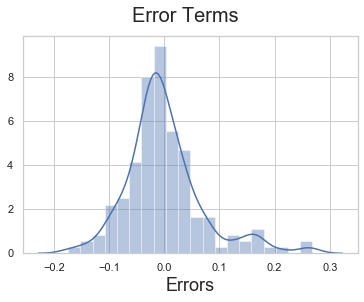

In [148]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [149]:
#make prediction using final model

#scaler = MinMaxScaler()

num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [150]:
df_test.describe()


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,EconomicCars,HighRisk,LowRisk,ModerateRisk
count,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000,41.0000
mean,0.9268,0.7805,0.5366,0.9756,0.4038,0.5049,0.4309,0.2287,0.7296,0.6442,0.1761,0.3481,0.3883,0.2452,0.0244,0.4146,0.5610,0.0244,0.0976,0.3415,0.4634,0.0732,0.0488,0.0000,0.0732,0.7317,0.0488,0.0976,0.0000,0.0488,0.0244,0.8293,0.0976,0.0000,0.0000,0.0000,0.0244,0.1951,0.0000,0.0732,0.0000,0.6341,0.0488,0.0244,0.1463,0.3659,0.4878,0.3659,0.0244,0.6098
std,0.2637,0.4191,0.5049,0.1562,0.2005,0.2545,0.2360,0.2191,0.2295,0.1964,0.2234,0.2757,0.2061,0.2231,0.1562,0.4988,0.5024,0.1562,0.3004,0.4801,0.5049,0.2637,0.2181,0.0000,0.2637,0.4486,0.2181,0.3004,0.0000,0.2181,0.1562,0.3809,0.3004,0.0000,0.0000,0.0000,0.1562,0.4012,0.0000,0.2637,0.0000,0.4877,0.2181,0.1562,0.3578,0.4877,0.5061,0.4877,0.1562,0.4939
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,1.0000,0.0000,1.0000,0.2711,0.3222,0.2720,0.0917,0.5794,0.5866,0.1032,0.1223,0.2653,0.0848,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,1.0000,1.0000,1.0000,0.3644,0.5778,0.4397,0.1468,0.7937,0.6480,0.1290,0.3165,0.3469,0.1990,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,1.0000,1.0000,1.0000,1.0000,0.5160,0.6667,0.5891,0.2569,0.8571,0.7430,0.1548,0.5540,0.5102,0.2919,0.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [151]:

y_test = df_test.pop('price')
X_test = df_test
#X_test.describe()

In [152]:

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_15.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [153]:

y_pred = lr_4.predict(X_test_new)


Text(0, 0.5, 'y_pred')

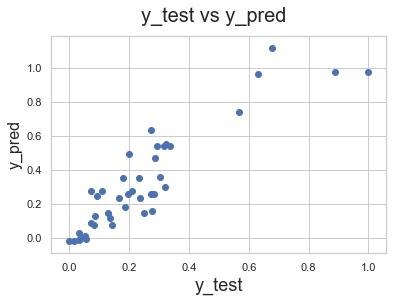

In [154]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                    

In [155]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4957257431733979